In [1]:
import os
import statistics
import torch
import math
from Bio import SeqIO
import matplotlib.pyplot as plt
%matplotlib inline
import random
import pandas as pd
import re
from functools import reduce
import numpy as np
import seaborn as sn

In [2]:
fasta_file = 'trna/lotta_trna.fa'

In [165]:
trnas = []
fasta_file = 'trna/trna.fa'
for record in SeqIO.parse(fasta_file, "fasta"):
        trnas.append(str(record.seq).upper())

random.seed(42)
random.shuffle(trnas)
trnas = trnas[:200000]
trnas= [re.sub(r'.*[^GCTAN].*', '', s) for s in trnas]


while('' in trnas):  #remove empty sequences
    trnas.remove('')

trnas = [s for s in trnas if len(s) <= 100] #removes really long sequences
avg = math.ceil(statistics.mean(len(s) for s in trnas))

if avg % 2 == 1:
    avg += 1

trnas = [s for s in trnas if len(s) >= 70]


In [166]:
min(len(s) for s in trnas)

70

In [167]:
for i,s in enumerate(trnas):  #either pad or cut from the sequence so they are the same length 
    if len(s) < avg:
        pad = avg- len(s)
        s += 'N' * pad
        trnas[i] = s
    elif len(s) > avg:
        s = s[:avg]
        trnas[i] = s

In [168]:
b = {}
for w in trnas:
    chs = list(w)
    for position, (ch1, ch2) in enumerate(zip(chs[::2], chs[1::2])):
        original_position = position * 2
        bigram = ((ch1+ch2), original_position) # a tuple #dictionary.get(keyname, value) where value is Optional. A value to return if the specified key does not exist Default value None
        b[bigram] = b.get(bigram, 0) + 1

In [169]:
b

{('GG', 0): 18667,
 ('GG', 2): 13033,
 ('GT', 4): 7372,
 ('AT', 6): 8214,
 ('AG', 8): 15494,
 ('CT', 10): 15125,
 ('CA', 12): 16286,
 ('GT', 14): 12165,
 ('GG', 16): 13701,
 ('TA', 18): 11297,
 ('GA', 20): 9115,
 ('GC', 22): 9130,
 ('AT', 24): 4294,
 ('TT', 26): 5142,
 ('GA', 28): 5292,
 ('CT', 30): 11337,
 ('GC', 32): 5940,
 ('AG', 34): 5439,
 ('AT', 36): 12024,
 ('TA', 38): 1845,
 ('AG', 40): 6371,
 ('AG', 42): 8931,
 ('GT', 44): 7510,
 ('CC', 46): 9104,
 ('CC', 48): 4037,
 ('AG', 50): 1744,
 ('TT', 52): 10733,
 ('CA', 54): 7007,
 ('AA', 56): 6316,
 ('TC', 58): 7700,
 ('TG', 60): 1261,
 ('GG', 62): 7420,
 ('TG', 64): 4795,
 ('CC', 66): 5534,
 ('CC', 68): 5467,
 ('CT', 70): 5158,
 ('NN', 72): 11422,
 ('NN', 74): 19866,
 ('GA', 4): 1527,
 ('TT', 6): 2707,
 ('AA', 14): 1849,
 ('TG', 16): 7620,
 ('GT', 18): 8104,
 ('AG', 20): 8263,
 ('AG', 22): 7866,
 ('CG', 24): 6139,
 ('CT', 26): 6001,
 ('CG', 28): 4536,
 ('TA', 32): 5253,
 ('GC', 34): 8456,
 ('GC', 38): 5552,
 ('GA', 40): 5077,
 ('GA'

In [170]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('NN', 74), 19866),
 (('GG', 0), 18667),
 (('CA', 12), 16286),
 (('AG', 8), 15494),
 (('CT', 10), 15125),
 (('GG', 50), 14577),
 (('GG', 16), 13701),
 (('GG', 2), 13033),
 (('GT', 14), 12165),
 (('AT', 36), 12024),
 (('CC', 60), 11651),
 (('NN', 72), 11422),
 (('CT', 30), 11337),
 (('TA', 18), 11297),
 (('TT', 52), 10733),
 (('GT', 6), 10129),
 (('GC', 22), 9130),
 (('GA', 20), 9115),
 (('CC', 46), 9104),
 (('AG', 42), 8931),
 (('GC', 34), 8456),
 (('AG', 20), 8263),
 (('AT', 6), 8214),
 (('GT', 18), 8104),
 (('AG', 22), 7866),
 (('TC', 58), 7700),
 (('TG', 16), 7620),
 (('CA', 34), 7535),
 (('GT', 44), 7510),
 (('TC', 54), 7480),
 (('GG', 62), 7420),
 (('GT', 4), 7372),
 (('GG', 44), 7270),
 (('GA', 42), 7027),
 (('CA', 54), 7007),
 (('CC', 70), 6863),
 (('TT', 30), 6585),
 (('AN', 72), 6538),
 (('AG', 40), 6371),
 (('AA', 56), 6316),
 (('AT', 56), 6145),
 (('CG', 24), 6139),
 (('CT', 26), 6001),
 (('GC', 32), 5940),
 (('GA', 56), 5748),
 (('GG', 8), 5607),
 (('GC', 38), 5552),
 (('

In [171]:
type(avg)

int

In [172]:
a

38

In [173]:
a = int(avg/2)
N = torch.zeros((a, 25),  dtype = torch.int32)

In [174]:
chars = sorted(list(set((i[0] for i in b))))

In [175]:
chars

['AA',
 'AC',
 'AG',
 'AN',
 'AT',
 'CA',
 'CC',
 'CG',
 'CN',
 'CT',
 'GA',
 'GC',
 'GG',
 'GN',
 'GT',
 'NA',
 'NC',
 'NG',
 'NN',
 'NT',
 'TA',
 'TC',
 'TG',
 'TN',
 'TT']

In [176]:
len(chars)

25

In [177]:
stoi={s:i for i,s in enumerate(chars)}
itos = {i:s for s,i in stoi.items()}

In [178]:
stoi

{'AA': 0,
 'AC': 1,
 'AG': 2,
 'AN': 3,
 'AT': 4,
 'CA': 5,
 'CC': 6,
 'CG': 7,
 'CN': 8,
 'CT': 9,
 'GA': 10,
 'GC': 11,
 'GG': 12,
 'GN': 13,
 'GT': 14,
 'NA': 15,
 'NC': 16,
 'NG': 17,
 'NN': 18,
 'NT': 19,
 'TA': 20,
 'TC': 21,
 'TG': 22,
 'TN': 23,
 'TT': 24}

In [179]:
for w in b:
    bi, pos = w[0], w[1]
    row = int(pos/2)
    col = stoi[bi]
    N[row][col] += b[(bi, pos)]
    

In [180]:
N= N+1

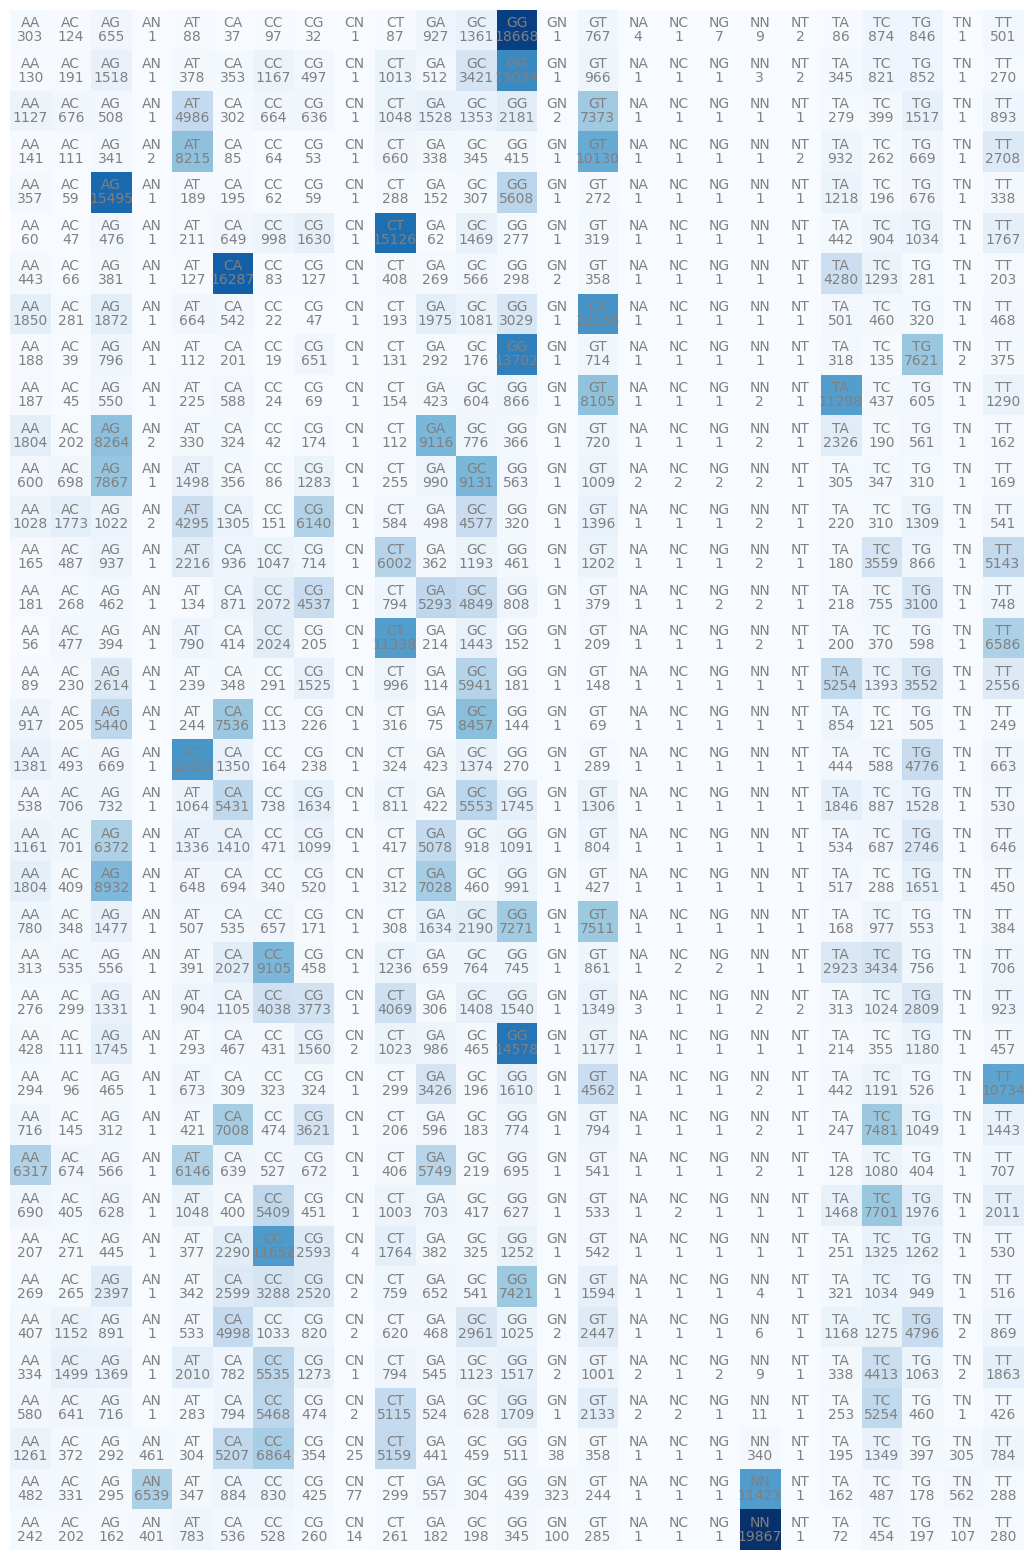

In [181]:
plt.figure(figsize = (20,20))
plt.imshow(N, cmap = 'Blues')
for i in range(38):
    for j in range(25):
        plt.text(j, i, itos[j], ha = 'center', va = 'bottom', color = 'gray') #horizontal and vertical alognments
        plt.text(j, i, N[i, j].item(), ha = 'center', va = 'top', color = 'gray') # the count at the bottom
plt.axis('off');

In [182]:
P = N.float() #Get the probabilities
P /= P.sum(1, keepdims = True) 

In [183]:
P.shape

torch.Size([38, 25])

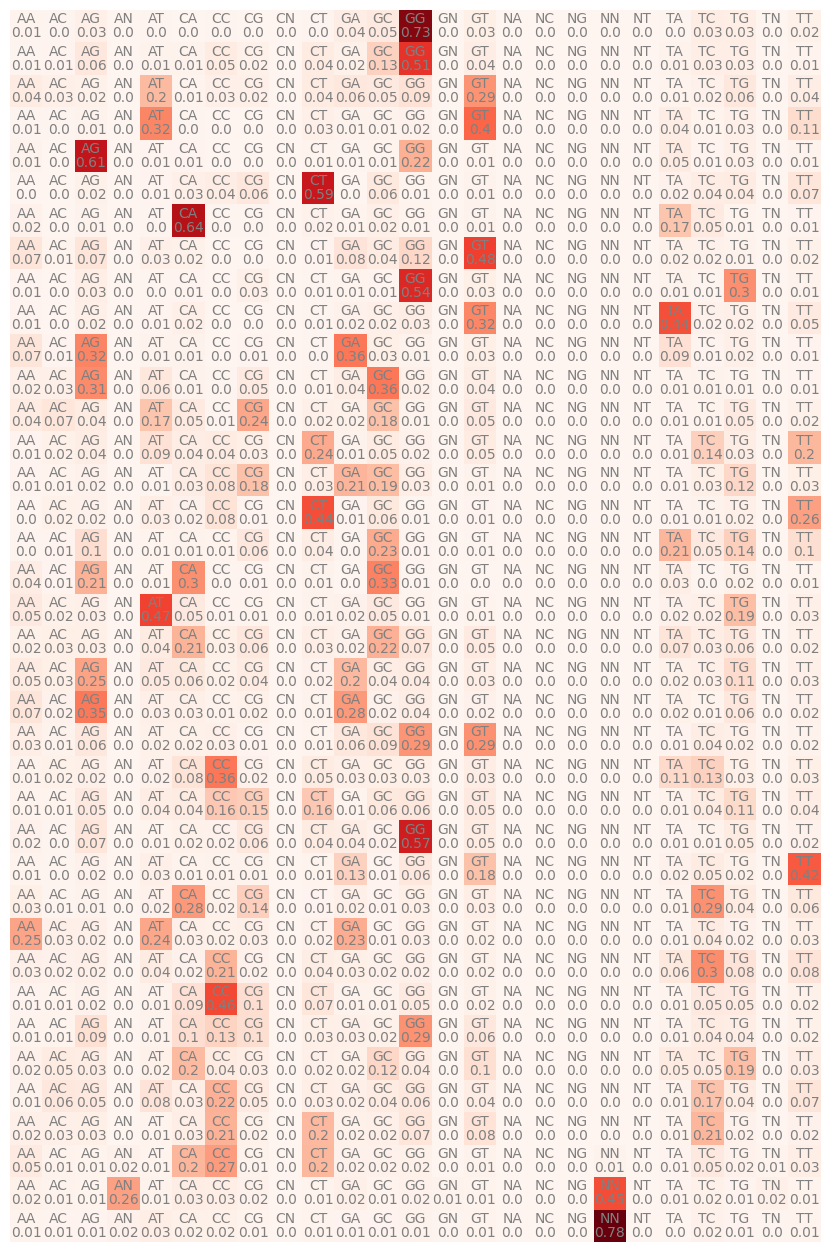

In [184]:
plt.figure(figsize = (16,16))
plt.imshow(P, cmap = 'Reds')
for i in range(38):
    for j in range(25):
        plt.text(j, i, itos[j], ha = 'center', va = 'bottom', color = 'gray') #horizontal and vertical alognments
        plt.text(j, i, round(P[i, j].item(),2), ha = 'center', va = 'top', color = 'gray') # the count at the bottom
plt.axis('off');

In [185]:
def seq_probs(sequences):
    probs = []
    for seq in sequences:
        m = 0.0
        for position, (ch1, ch2) in enumerate(zip(seq[::2], seq[1::2])):
            row = position
            bigram = ch1+ch2
            col = stoi[bigram]
            m += torch.log(P[row][col])
        num_events = len(seq)
        probs.append(m/num_events)
    return probs

In [186]:
trna_probs = seq_probs(trnas)

In [187]:
trna_probs
trna_probs_list = torch.stack(trna_probs).numpy()
sum = reduce(lambda x, y: x + y, trna_probs_list)

In [188]:
min(trna_probs_list), max(trna_probs_list)

(-2.2016754, -0.5621089)

In [189]:
test = []

for s, p in zip(trnas, trna_probs_list):
    test.append((s, p))



In [194]:
sorted(test, key = lambda kv: -kv[1])

[('GGGGGTATAGCTCAGGGGTAGAGCATTTGACTGCAGATCAAGAGGTCCCTGGTTCAAATCCCGGTGCCCCCTNNNN',
  -0.5621089),
 ('GGGGGTGTAGCTCAGTGGTAGAGCATTTGACTGCAGATCAAGAGGTCCCTGGTTCAAATCCAGGTGCCCCCTNNNN',
  -0.5624638),
 ('GGGGGTGTAGCTCAGTGGTAGAGCATTTGACTGCAGATCAAGAGGTCCCTGGTTCAAATCCAGGTGCCCCCTNNNN',
  -0.5624638),
 ('GGGGGTGTAGCTCAGTGGTAGAGCATTTGACTGCAGATCAAGAGGTCCCTGGTTCAAATCCAGGTGCCCCCTNNNN',
  -0.5624638),
 ('GGGGGTGTAGCTCAGTGGTAGAGCATTTGACTGCAGATCAAGAGGTCCCTGGTTCAAATCCAGGTGCCCCCTNNNN',
  -0.5624638),
 ('GGGGGTGTAGCTCAGTGGTAGAGCATTTGACTGCAGATCAAGAGGTCCCTGGTTCAAATCCAGGTGCCCCCTNNNN',
  -0.5624638),
 ('GGGGGTGTAGCTCAGTGGTAGAGCATTTGACTGCAGATCAAGAGGTCCCTGGTTCAAATCCAGGTGCCCCCTNNNN',
  -0.5624638),
 ('GGGGGTATAGCTCAGTGGTAGAGCATTTGACTGCAGATCAAGAGGTCCCTGGTTCAAATCCGGGTGCCCCCTNNNN',
  -0.5635859),
 ('GGGGGTATAGCTCAGTGGTAGAGCATTTGACTGCAGATCAAGAGGTCCCTGGTTCAAATCCGGGTGCCCCCTNNNN',
  -0.5635859),
 ('GGGGGTATAGCTCAGTGGTAGAGCATTTGACTGCAGATCAAGAGGTCCCTGGTTCAAATCCGGGTGCCCCCTNNNN',
  -0.5635859),
 ('GGGGGTATAGCTCAGTGGTAGAGCATT

In [195]:
t

(array([1.000e+00, 0.000e+00, 2.600e+01, 3.610e+02, 9.880e+02, 1.087e+03,
        6.830e+02, 1.862e+03, 1.860e+03, 1.404e+03, 1.234e+03, 2.941e+03,
        2.862e+03, 4.839e+03, 5.307e+03]),
 array([-2.20167542, -2.09237099, -1.98306656, -1.87376213, -1.7644577 ,
        -1.65515327, -1.54584885, -1.43654442, -1.32723987, -1.21793544,
        -1.10863101, -0.99932665, -0.89002216, -0.78071773, -0.6714133 ,
        -0.56210887]),
 <BarContainer object of 15 artists>)

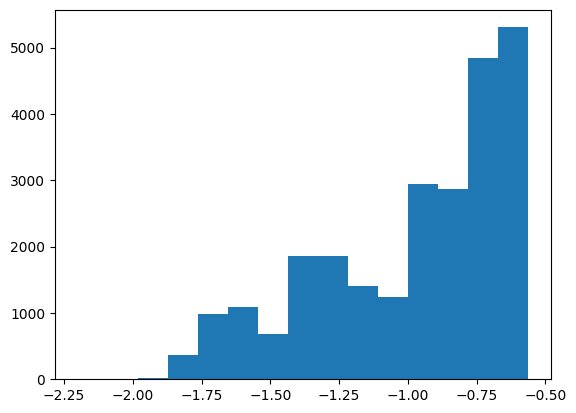

In [196]:
plt.hist(trna_probs_list, bins = 15)

In [197]:
threshold = min(trna_probs_list)

testing_yes = trnas[-200:]

In [236]:
testing_no = []
for _ in range(200):
    np_values = np.asarray(['A', 'T', 'C', 'G', 'N'])
    np_count = np.asarray([2, 2, 2, 2, 1])
    np_urn = np.repeat(np_values, np_count)
    N = avg
    sequence = np.random.choice(np_urn, size=N, p=None, replace=True)
    sequence = ''.join(sequence)
    testing_no.append(sequence)

In [237]:
res_n = seq_probs(testing_no)

In [238]:
min(res_n), max(res_n) # the no data 

(tensor(-2.3968), tensor(-1.6271))

In [239]:
res_y = seq_probs(testing_yes)

In [240]:
min(res_y), max(res_y) #the yes data

(tensor(-1.8553), tensor(-0.5636))

In [241]:
str = ''
for i in trnas:
    str += ''.join(i)

In [242]:
c = {}
for b in str:
    c[b] = c.get(b, 0) + 1
        

In [243]:
list(c.keys())

['G', 'T', 'A', 'C', 'N']

In [244]:
x = 0 
for i in c.values():
    x+= i

In [245]:
for i in c:
    c[i] = c[i]/x

In [246]:
c

{'G': 0.30373000858067384,
 'T': 0.23054202979458074,
 'A': 0.19654188506032316,
 'C': 0.23179759947895667,
 'N': 0.03738847708546558}

In [247]:
rates = {'TN': 0, 'TP' : 0, 'FN': 0, 'FP':0}

for y, n in zip(res_y, res_n):
    if y.item() >= threshold:
        rates['TP'] += 1
    if n.item() >= threshold:
        rates['FP'] += 1
    if y.item() < threshold:
        rates['FN'] += 1
    if n.item() < threshold:
        rates['TN'] += 1

In [248]:
array = [[rates['TN'], rates['FP']], [rates['FN'], rates['TP']]]

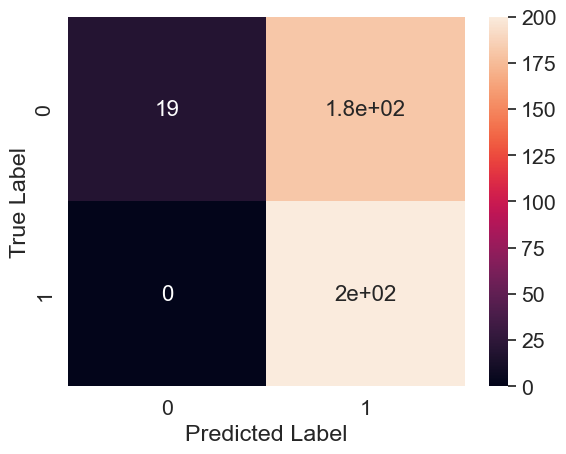

In [249]:
df_cm = pd.DataFrame(array, range(2), range(2))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

In [250]:
rates

{'TN': 19, 'TP': 200, 'FN': 0, 'FP': 181}